In [146]:
import math
from sympy import *
import numpy as np
init_printing(use_unicode=True)
import matplotlib.pyplot as plt
x, y, z, l =symbols('x y z l')

In [147]:
from icecream import ic

In [148]:
def t1(func, Nn, x0):
    ic(func, Nn, x0)
    skladowe = []
    szeregTaylora = 0
    for n in range(1, Nn+1):
        pochodna = diff(func, x, n)
        pochodnaX = pochodna.subs(x, x0)
        skladowa = pochodnaX / math.factorial(n) * ((x - x0)**n)
        ic(pochodna, pochodnaX, skladowa)
        skladowe.append(skladowa)
        szeregTaylora += skladowa
    
    funcLambda = lambdify(x, func, modules=['numpy'])
    taylorLambda = lambdify(x, szeregTaylora, modules=['numpy'])
    skladoweLambda = [lambdify(x, sklad, modules=['numpy']) for sklad in skladowe]
    
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(x0-2*math.pi, x0+2*math.pi, 400)
    # Wykres funkcji f(x)
    plt.plot(x_vals, funcLambda(x_vals), label='func_label')
    
    # Wykres N-tego przybliżenia funkcji f(x) szeregiem Taylora
    plt.plot(x_vals, taylorLambda(x_vals), label='approx_label')
    
    # Wykres składowych N-tego przybliżenia
    for i, sklad in enumerate(skladoweLambda):
        plt.plot(x_vals, sklad(x_vals), linestyle='--', label=f'a{i}(x)')
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Przybliżenie funkcji szeregiem Taylora')
    plt.grid(True)
    plt.show()
    
    return skladowe, szeregTaylora

ic| func: sin(x), Nn: 3, x0: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: -cos(x), pochodnaX: -1, skladowa: -x**3/6


ValueError: x and y must have same first dimension, but have shapes (400,) and (1,)

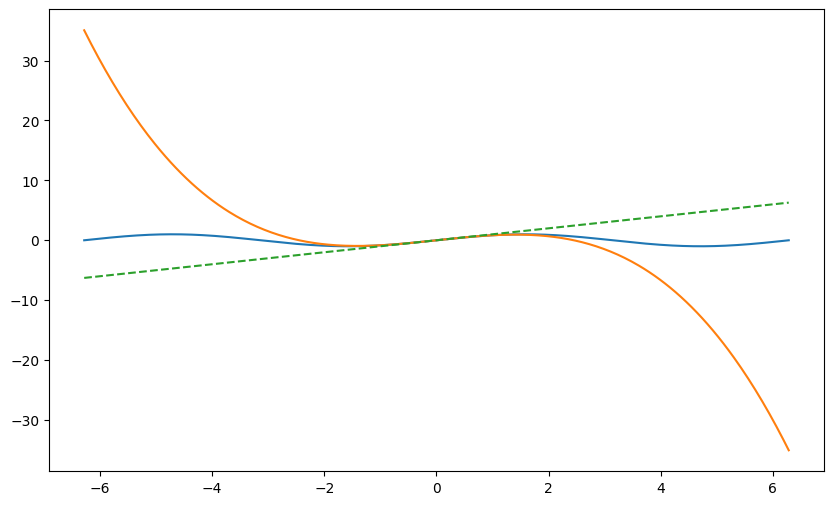

In [149]:
ic(t1(sin(x), 3, 0))